__autor__ = Melany Calderón-Osorno

__versión__ = 0.2

__fecha__ = 2025-07-09

#**Quast Postprocessing Plots**

This tutorial uses the tables generated from the QUAST post-processing step to guide you in creating publication-ready figures.

#**Setup notebook environment**

The following code installs the required libraries.

In [1]:
install.packages('patchwork')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



The following code imports the required libraries.

In [2]:
library(readxl)
library(dplyr)
library(ggplot2)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**Input/Output paths**


**Inputs**

We define variables to store the tables generated from QUAST post-processing, along with the study metadata.

In [3]:
nc = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/results/Quast_processing/Ncontigs_combined.xlsx'
ncf <- tempfile(fileext = ".xlsx")
download.file(nc, destfile = ncf, mode = "wb")

n50 = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/results/Quast_processing/N50_combined.xlsx'
n50f <- tempfile(fileext = ".xlsx")
download.file(n50, destfile = n50f, mode = "wb")

n90 = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/results/Quast_processing/N90_combined.xlsx'
n90f <- tempfile(fileext = ".xlsx")
download.file(n90, destfile = n90f, mode = "wb")

tl = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/results/Quast_processing/TotalLength_combined.xlsx'
tlf <- tempfile(fileext = ".xlsx")
download.file(tl, destfile = tlf, mode = "wb")

lc = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/results/Quast_processing/Largestcontig_combined.xlsx'
lcf <- tempfile(fileext = ".xlsx")
download.file(lc, destfile = lcf, mode = "wb")

mtd = 'https://raw.githubusercontent.com/mecalderon/Tutorial_Summer_Retreat/master/data/data-deepsea.xlsx'
mtdf <- tempfile(fileext = ".xlsx")
download.file(mtd, destfile = mtdf, mode = "wb")

We import the study metadata.

In [4]:
metadata <- read_excel(mtdf)
head(metadata)

ENA_Run_Accession_ID,Sample,Ocean,Depth,depth.group,Longitude,Latitude
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
TARA_B100001179,ERR598944,Atlantic,-800,270-1000,-16.8714,43.7182
TRAA_B100000470,ERR598947,Atlantic,-700,270-1000,4.6685,-31.0198
TARA_B100001750,ERR598958,Indian,-250,270-1000,-56.9684,34.1504
TARA_B000000460,ERR598960,Indian,-850,270-1000,26.2905,-35.1889
TARA_B100001765,ERR598964,Atlantic,-740,270-1000,-49.8233,34.0771
TARA_B100000929,ERR598971,Pacific,-380,270-1000,-84.5546,2.0649


**N contigs**

The Ncontigs data is read and merged with the metadata based on matching sample identifiers, and the first few rows of the resulting dataset are displayed.

In [5]:
ncontigs <- read_excel(ncf)
ncontigs <- merge(ncontigs, metadata, by.x = "Assembly", by.y = "Sample")
head(ncontigs)

,Assembly,# contigs,ENA_Run_Accession_ID,Ocean,Depth,depth.group,Longitude,Latitude
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ERR598944,354,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
2,ERR598947,94,TRAA_B100000470,Atlantic,-700,270-1000,4.6685,-31.0198
3,ERR598958,219,TARA_B100001750,Indian,-250,270-1000,-56.9684,34.1504
4,ERR598960,279,TARA_B000000460,Indian,-850,270-1000,26.2905,-35.1889
5,ERR598964,370,TARA_B100001765,Atlantic,-740,270-1000,-49.8233,34.0771
6,ERR598971,140,TARA_B100000929,Pacific,-380,270-1000,-84.5546,2.0649


The ncontigs data is group by Ocean and calculates the total number of contigs (# contigs) for each ocean, storing the result in oceanNcontigs.

In [6]:
oceanNcontigs <- ncontigs %>% group_by(Ocean)  %>% summarise(Ntotal = sum(`# contigs`))
oceanNcontigs

Ocean,Ntotal
<chr>,<dbl>
Atlantic,4164
Indian,2443
Pacific,3574


The ncontigs data is group by depth and calculates the total number of contigs (# contigs) for each depth, storing the result in depthNcontigs.

In [7]:
depthNcontigs <- ncontigs %>% group_by(depth.group)  %>% summarise(Ntotal = sum(`# contigs`))
depthNcontigs

depth.group,Ntotal
<chr>,<dbl>
2400-4005,2980
270-1000,7201


The ncontigs data is group by both Ocean and depth.group, then calculates the total number of contigs (# contigs) for each ocean-depth combination, storing the result in ocean_depthNcontigs.

In [8]:
ocean_depthNcontigs <- ncontigs %>% group_by(Ocean, depth.group )  %>% summarise(Ntotal = sum(`# contigs`))
ocean_depthNcontigs

`summarise()` has grouped output by 'Ocean'. You can override using the
`.groups` argument.


Ocean,depth.group,Ntotal
<chr>,<chr>,<dbl>
Atlantic,2400-4005,1533
Atlantic,270-1000,2631
Indian,2400-4005,741
Indian,270-1000,1702
Pacific,2400-4005,706
Pacific,270-1000,2868


The following code performs a Kruskal-Wallis test to evaluate whether there are significant differences in the total number of contigs (Ntotal) among different depth groups in the ocean_depthNcontigs dataset, and stores the result in kw.size.env.

In [9]:
kw.size.env <-  kruskal.test(Ntotal ~ depth.group, data = ocean_depthNcontigs)
kw.size.env


	Kruskal-Wallis rank sum test

data:  Ntotal by depth.group
Kruskal-Wallis chi-squared = 3.8571, df = 1, p-value = 0.04953


The following code performs a Kruskal-Wallis test to evaluate whether there are significant differences in the total number of contigs (Ntotal) among different oceans in the ocean_depthNcontigs dataset, and stores the result in kw.size.env.

In [10]:
kw.size.env <- kruskal.test(Ntotal ~ Ocean, data = ocean_depthNcontigs)
kw.size.env


	Kruskal-Wallis rank sum test

data:  Ntotal by Ocean
Kruskal-Wallis chi-squared = 0.28571, df = 2, p-value = 0.8669


The code creates a boxplot, showing the total number of contigs (Ntotal) across two depth groups.

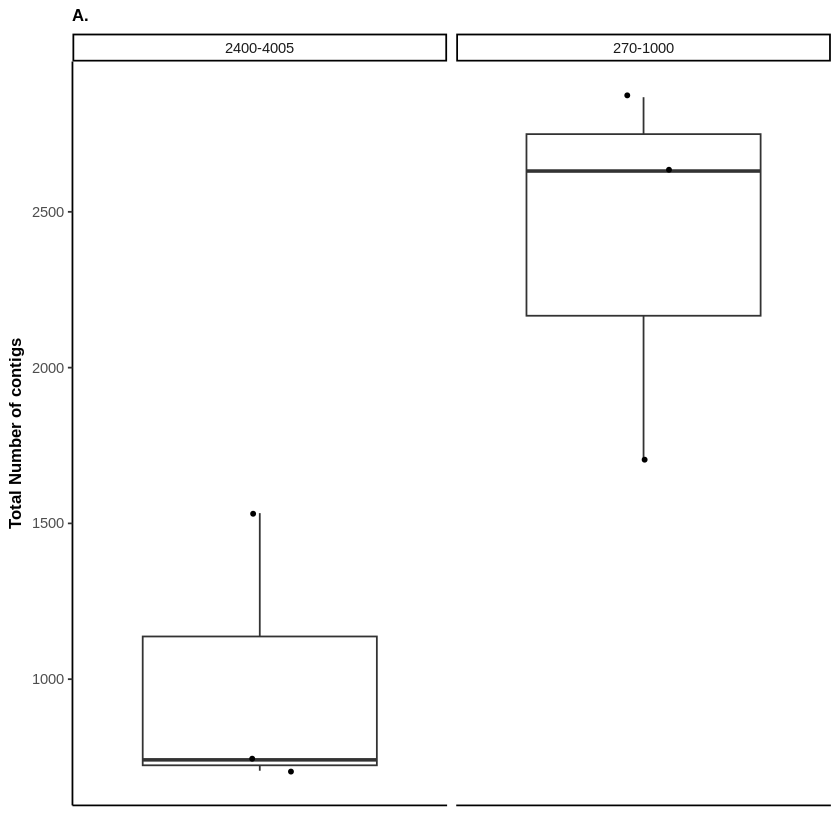

In [11]:
g1=ggplot(ocean_depthNcontigs, aes(x = factor(`depth.group`, levels=c("270_1000", "2400_4005")), y = Ntotal)) +
  geom_boxplot() + geom_jitter(width = 0.1, size=1)+
  facet_grid(~ depth.group, scales = "free_x", space = "free_x")+
  ylab("Total Number of contigs") + xlab("")+
  theme_classic()+ ggtitle("A.")+
  theme(plot.title = element_text(size = 10, face="bold"),
        axis.text.x = element_blank(),
        axis.title.y = element_text(size=10,face="bold"),
        axis.ticks.x=element_blank(),
        legend.text = element_text(size = 8),
        legend.position = "none",
        legend.title = element_text(size = 8),
        legend.key.size = unit(0.4, "cm"))
g1

**N50**

The N50 data is read and merged with the metadata based on matching sample identifiers, and the first few rows of the resulting dataset are displayed.

In [12]:
n50 <- read_excel(n50f)
n50 <- merge(n50, metadata, by.x = "Assembly", by.y = "Sample")
head(n50)

,Assembly,N50,ENA_Run_Accession_ID,Ocean,Depth,depth.group,Longitude,Latitude
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ERR598944,27627,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
2,ERR598947,5296,TRAA_B100000470,Atlantic,-700,270-1000,4.6685,-31.0198
3,ERR598958,33415,TARA_B100001750,Indian,-250,270-1000,-56.9684,34.1504
4,ERR598960,23061,TARA_B000000460,Indian,-850,270-1000,26.2905,-35.1889
5,ERR598964,85362,TARA_B100001765,Atlantic,-740,270-1000,-49.8233,34.0771
6,ERR598971,58473,TARA_B100000929,Pacific,-380,270-1000,-84.5546,2.0649


The N50 data is group by Ocean and calculates the total N50 for each ocean, storing the result in oceanN50.

In [13]:
oceanN50 <- n50 %>% group_by(Ocean)  %>% summarise(N50total = sum(N50))
oceanN50

Ocean,N50total
<chr>,<dbl>
Atlantic,511652
Indian,246887
Pacific,2260950


The N50 data is group by depth and calculates the total N50 for each depth, storing the result in depthN50.

In [14]:
depthN50 <- n50 %>% group_by(depth.group)  %>% summarise(N50total = sum(N50))
depthN50

depth.group,N50total
<chr>,<dbl>
2400-4005,249828
270-1000,2769661


The N50 data is group by both Ocean and depth.group, then calculates the total N50 for each ocean-depth combination, storing the result in ocean_depthN50.

In [15]:
ocean_depthN50 <- n50 %>% group_by(Ocean, depth.group )  %>% summarise(N50total = sum(N50))
ocean_depthN50

`summarise()` has grouped output by 'Ocean'. You can override using the
`.groups` argument.


Ocean,depth.group,N50total
<chr>,<chr>,<dbl>
Atlantic,2400-4005,186919
Atlantic,270-1000,324733
Indian,2400-4005,41423
Indian,270-1000,205464
Pacific,2400-4005,21486
Pacific,270-1000,2239464


The following code performs a Kruskal-Wallis test to evaluate whether there are significant differences in the total N50 among different depth groups in the ocean_depthN50 dataset, and stores the result in kw.size.env.

In [16]:
kw.size.env <-  kruskal.test(N50total ~ depth.group, data = ocean_depthN50)
kw.size.env


	Kruskal-Wallis rank sum test

data:  N50total by depth.group
Kruskal-Wallis chi-squared = 3.8571, df = 1, p-value = 0.04953


The following code performs a Kruskal-Wallis test to evaluate whether there are significant differences in the total N50 among different oceans in the ocean_depthN50 dataset, and stores the result in kw.size.env.

In [17]:
kw.size.env <- kruskal.test(N50total ~ Ocean, data = ocean_depthN50)
kw.size.env


	Kruskal-Wallis rank sum test

data:  N50total by Ocean
Kruskal-Wallis chi-squared = 0.28571, df = 2, p-value = 0.8669


The code creates a boxplot, showing the total N50 across two depth groups.

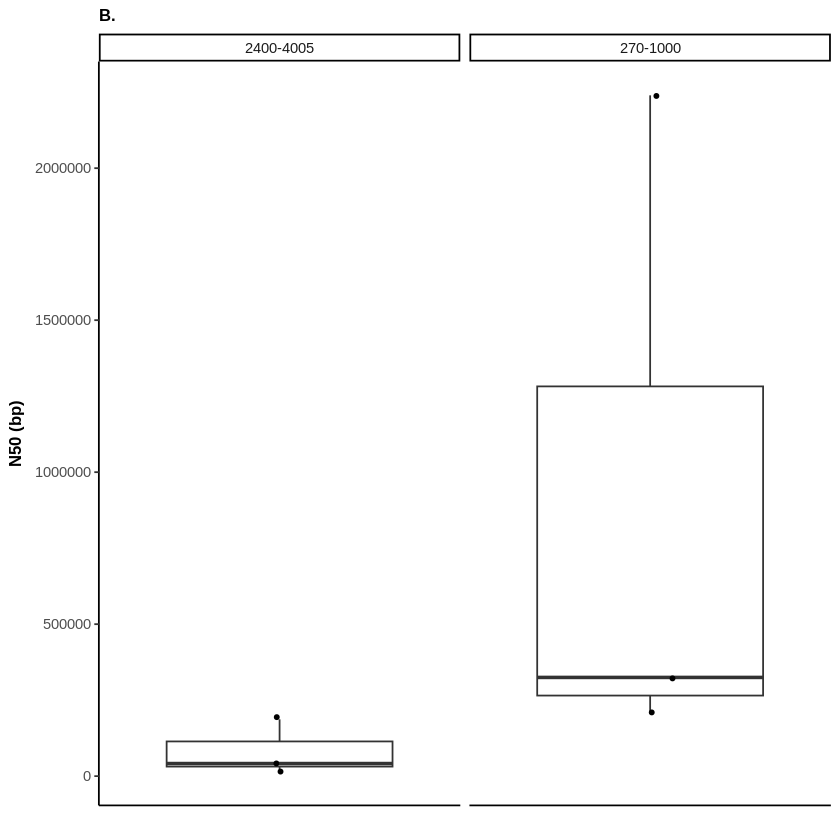

In [18]:
g2=ggplot(ocean_depthN50, aes(x = factor(`depth.group`, levels=c("270_1000", "2400_4005")), y = N50total)) +
  geom_boxplot() + geom_jitter(width = 0.1, size=1)+
  facet_grid(~ depth.group, scales = "free_x", space = "free_x")+
  ylab("N50 (bp)") + xlab("")+
  theme_classic()+ ggtitle("B.")+
  theme(plot.title = element_text(size = 10, face="bold"),
        axis.text.x = element_blank(),
        axis.title.y = element_text(size=10,face="bold"),
        axis.ticks.x=element_blank(),
        legend.text = element_text(size = 8),
        legend.position = "none",
        legend.title = element_text(size = 8),
        legend.key.size = unit(0.4, "cm"))
g2

**N90**

The N90 data is read and merged with the metadata based on matching sample identifiers, and the first few rows of the resulting dataset are displayed.

In [19]:
n90 <-read_excel(n90f)

n90 <- merge(n90, metadata, by.x = "Assembly", by.y = "Sample")
head(n90)

,Assembly,N90,ENA_Run_Accession_ID,Ocean,Depth,depth.group,Longitude,Latitude
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ERR598944,1883,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
2,ERR598947,1740,TRAA_B100000470,Atlantic,-700,270-1000,4.6685,-31.0198
3,ERR598958,1852,TARA_B100001750,Indian,-250,270-1000,-56.9684,34.1504
4,ERR598960,3150,TARA_B000000460,Indian,-850,270-1000,26.2905,-35.1889
5,ERR598964,2052,TARA_B100001765,Atlantic,-740,270-1000,-49.8233,34.0771
6,ERR598971,3714,TARA_B100000929,Pacific,-380,270-1000,-84.5546,2.0649


The N90 data is group by Ocean and calculates the total N90 for each ocean, storing the result in oceanN90.

In [20]:
oceanN90 <- n90 %>% group_by(Ocean)  %>% summarise(N90total = sum(N90))
oceanN90

Ocean,N90total
<chr>,<dbl>
Atlantic,54880
Indian,35113
Pacific,98632


The N90 data is group by depth and calculates the total N90 for each depth, storing the result in depthN90.

In [21]:
depthN90 <- n90 %>% group_by(depth.group)  %>% summarise(N90total = sum(N90))
depthN90

depth.group,N90total
<chr>,<dbl>
2400-4005,44110
270-1000,144515


The N90 data is group by both Ocean and depth.group, then calculates the total N90 for each ocean-depth combination, storing the result in ocean_depthN90.

In [22]:
ocean_depthN90 <- n90 %>% group_by(Ocean, depth.group )  %>% summarise(N90total = sum(N90))
ocean_depthN90

`summarise()` has grouped output by 'Ocean'. You can override using the
`.groups` argument.


Ocean,depth.group,N90total
<chr>,<chr>,<dbl>
Atlantic,2400-4005,20740
Atlantic,270-1000,34140
Indian,2400-4005,13323
Indian,270-1000,21790
Pacific,2400-4005,10047
Pacific,270-1000,88585


**Total Lenght**

The total lenght data is read and merged with the metadata based on matching sample identifiers, and the first few rows of the resulting dataset are displayed.

In [23]:
TotalLenght <- read_excel(tlf)

TotalLenght <- merge(TotalLenght, metadata, by.x = "Assembly", by.y = "Sample")
head(TotalLenght)

,Assembly,Total length,ENA_Run_Accession_ID,Ocean,Depth,depth.group,Longitude,Latitude
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ERR598944,2397671,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
2,ERR598947,363753,TRAA_B100000470,Atlantic,-700,270-1000,4.6685,-31.0198
3,ERR598958,1534979,TARA_B100001750,Indian,-250,270-1000,-56.9684,34.1504
4,ERR598960,2517952,TARA_B000000460,Indian,-850,270-1000,26.2905,-35.1889
5,ERR598964,3011014,TARA_B100001765,Atlantic,-740,270-1000,-49.8233,34.0771
6,ERR598971,1487193,TARA_B100000929,Pacific,-380,270-1000,-84.5546,2.0649


The total lenght data is group by Ocean and calculates the total lenght for each ocean, storing the result in oceanTotalLenght.

In [24]:
oceanTotalLenght <- TotalLenght %>% group_by(Ocean)  %>% summarise(TotalLenght = sum(`Total length`))
oceanTotalLenght

Ocean,TotalLenght
<chr>,<dbl>
Atlantic,21538404
Indian,16135295
Pacific,23840753


The total lenght data is group by depth and calculates the total lenght for each depth, storing the result in depthTotalLenght.

In [25]:
depthTotalLenght <- TotalLenght %>% group_by(depth.group)  %>% summarise(TotalLenght = sum(`Total length`))
depthTotalLenght

depth.group,TotalLenght
<chr>,<dbl>
2400-4005,10596361
270-1000,50918091


The total lenght data is group by both Ocean and depth.group, then calculates the total lenght for each ocean-depth combination, storing the result in ocean_depthTotalLenght.

In [26]:
ocean_depthTotalLenght <- TotalLenght %>% group_by(Ocean, depth.group )  %>% summarise(TotalLenght = sum(`Total length`))
ocean_depthTotalLenght

`summarise()` has grouped output by 'Ocean'. You can override using the
`.groups` argument.


Ocean,depth.group,TotalLenght
<chr>,<chr>,<dbl>
Atlantic,2400-4005,5228610
Atlantic,270-1000,16309794
Indian,2400-4005,3169904
Indian,270-1000,12965391
Pacific,2400-4005,2197847
Pacific,270-1000,21642906


The following code performs a Kruskal-Wallis test to evaluate whether there are significant differences in the total lenght among different depth groups in the ocean_depthTotalLenght dataset, and stores the result in kw.size.env.

In [27]:
kw.size.env <- kruskal.test(TotalLenght ~ depth.group, data = ocean_depthTotalLenght)
kw.size.env


	Kruskal-Wallis rank sum test

data:  TotalLenght by depth.group
Kruskal-Wallis chi-squared = 3.8571, df = 1, p-value = 0.04953


The following code performs a Kruskal-Wallis test to evaluate whether there are significant differences in the total lenght among different oceans in the ocean_depthTotalLenght dataset, and stores the result in kw.size.env.

In [28]:
kw.size.env <- kruskal.test(TotalLenght ~ Ocean, data = ocean_depthTotalLenght)
kw.size.env


	Kruskal-Wallis rank sum test

data:  TotalLenght by Ocean
Kruskal-Wallis chi-squared = 0.28571, df = 2, p-value = 0.8669


The code creates a boxplot, showing the total lenght across two depth groups.

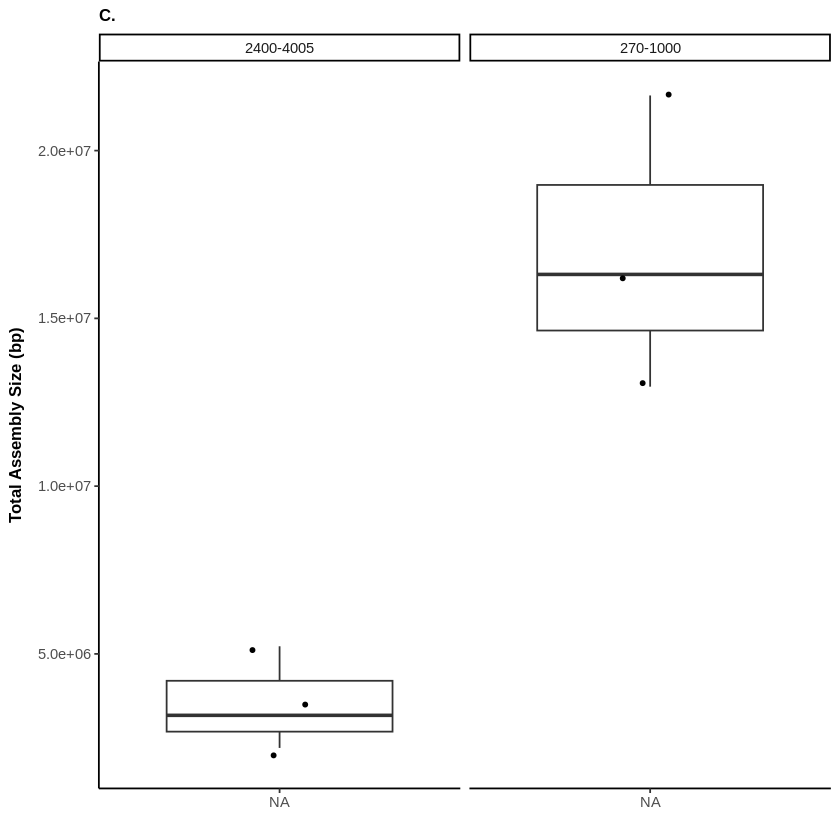

In [29]:
g3=ggplot(ocean_depthTotalLenght, aes(x = factor(`depth.group`, levels=c("270_1000", "2400_4005")), y =TotalLenght)) +
  geom_boxplot() + geom_jitter(width = 0.1, size=1)+
  facet_grid(~ depth.group, scales = "free_x", space = "free_x")+
  ylab("Total Assembly Size (bp)") + xlab("")+
  theme_classic()+ ggtitle("C.")+
  theme(plot.title = element_text(size = 10, face="bold"),
        #axis.text.x = element_blank(),
        axis.title.y = element_text(size=10,face="bold"),
        #axis.ticks.x=element_blank(),
        legend.text = element_text(size = 8),
        legend.position = "none",
        legend.title = element_text(size = 8),
        legend.key.size = unit(0.4, "cm"))
g3

**Largest contig**

The largest contig data is read and merged with the metadata based on matching sample identifiers, and the first few rows of the resulting dataset are displayed.

In [30]:
Largestcontig <- read_excel(lcf)

Largestcontig <- merge(Largestcontig, metadata, by.x = "Assembly", by.y = "Sample")
head(Largestcontig)

,Assembly,Largest contig,ENA_Run_Accession_ID,Ocean,Depth,depth.group,Longitude,Latitude
,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
1,ERR598944,301491,TARA_B100001179,Atlantic,-800,270-1000,-16.8714,43.7182
2,ERR598947,26245,TRAA_B100000470,Atlantic,-700,270-1000,4.6685,-31.0198
3,ERR598958,252570,TARA_B100001750,Indian,-250,270-1000,-56.9684,34.1504
4,ERR598960,195318,TARA_B000000460,Indian,-850,270-1000,26.2905,-35.1889
5,ERR598964,408615,TARA_B100001765,Atlantic,-740,270-1000,-49.8233,34.0771
6,ERR598971,142113,TARA_B100000929,Pacific,-380,270-1000,-84.5546,2.0649


The largest contig data is group by Ocean and calculates the total sum of the  largest contig for each ocean, storing the result in oceanLargestcontig.

In [31]:
oceanLargestcontig <- Largestcontig %>% group_by(Ocean)  %>% summarise(Largestcontigtotal = sum(`Largest contig`))
oceanLargestcontig

Ocean,Largestcontigtotal
<chr>,<dbl>
Atlantic,2261742
Indian,1490247
Pacific,4197486


The largest contig data is group by depth and calculates the total sum of the  largest contig for each depth, storing the result in depthLargestcontig.

In [32]:
depthLargestcontig <- Largestcontig %>% group_by(depth.group)  %>% summarise(Largestcontigtotal = sum(`Largest contig`))
depthLargestcontig

depth.group,Largestcontigtotal
<chr>,<dbl>
2400-4005,888501
270-1000,7060974


The largest contig is group by both Ocean and depth.group, then calculates the total sum of the largest contig for each ocean-depth combination, storing the result in ocean_depthLargestcontig.

In [33]:
ocean_depthLargestcontig <- Largestcontig %>% group_by(Ocean, depth.group )  %>% summarise(Largestcontigtotal = sum(`Largest contig`))
ocean_depthLargestcontig

`summarise()` has grouped output by 'Ocean'. You can override using the
`.groups` argument.


Ocean,depth.group,Largestcontigtotal
<chr>,<chr>,<dbl>
Atlantic,2400-4005,524505
Atlantic,270-1000,1737237
Indian,2400-4005,233314
Indian,270-1000,1256933
Pacific,2400-4005,130682
Pacific,270-1000,4066804


The following code performs a Kruskal-Wallis test to evaluate whether there are significant differences in the total sum of the largest contig among different depth groups in the ocean_depthLargestcontig dataset, and stores the result in kw.size.env.

In [34]:
kw.size.env <- kruskal.test(Largestcontigtotal ~ depth.group, data = ocean_depthLargestcontig)
kw.size.env


	Kruskal-Wallis rank sum test

data:  Largestcontigtotal by depth.group
Kruskal-Wallis chi-squared = 3.8571, df = 1, p-value = 0.04953


The following code performs a Kruskal-Wallis test to evaluate whether there are significant differences in the total sum of the largest contig among different oceans in the ocean_depthLargestcontig dataset, and stores the result in kw.size.env.

In [35]:
kw.size.env <- kruskal.test(Largestcontigtotal ~ Ocean, data = ocean_depthLargestcontig)
kw.size.env


	Kruskal-Wallis rank sum test

data:  Largestcontigtotal by Ocean
Kruskal-Wallis chi-squared = 0.28571, df = 2, p-value = 0.8669


The code creates a boxplot, showing the largest contig size across two depth groups.

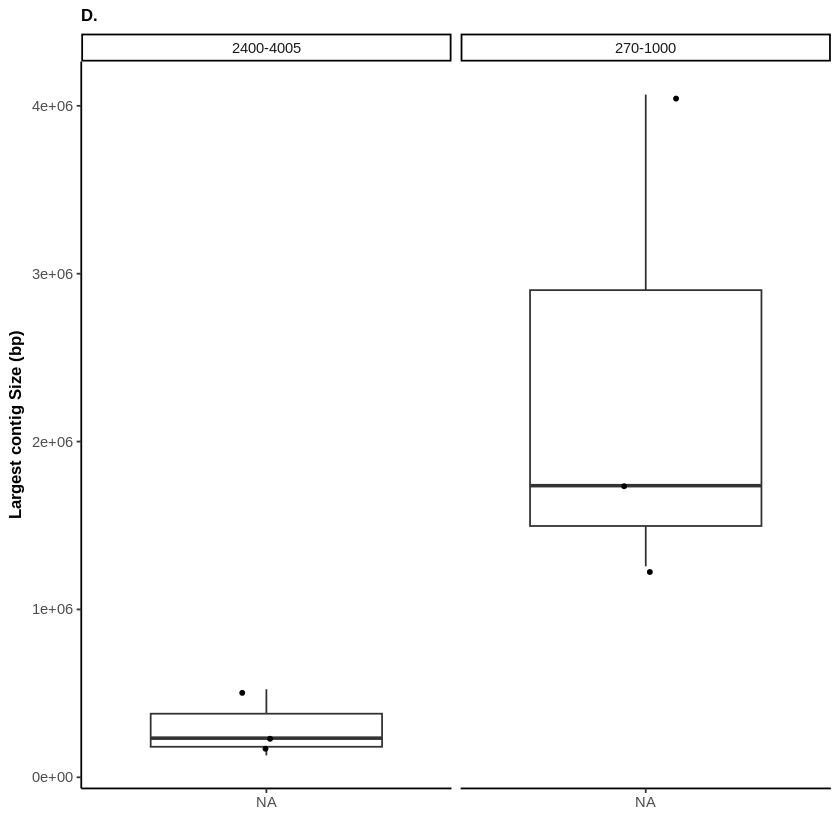

In [36]:
g4=ggplot(ocean_depthLargestcontig, aes(x = factor(`depth.group`, levels=c("270_1000", "2400_4005")), y = Largestcontigtotal)) +
  geom_boxplot() + geom_jitter(width = 0.1, size=1)+
  facet_grid(~ depth.group, scales = "free_x", space = "free_x")+
  ylab("Largest contig Size (bp)") + xlab("")+
  theme_classic()+ ggtitle("D.")+
  theme(plot.title = element_text(size = 10, face="bold"),
        #axis.text.x = element_blank(),
        axis.title.y = element_text(size=10,face="bold"),
        #axis.ticks.x=element_blank(),
        legend.text = element_text(size = 8),
        legend.position = "none",
        legend.title = element_text(size = 8),
        legend.key.size = unit(0.4, "cm"))
g4

Combine the four plots into a single layout and saves the resulting figure.

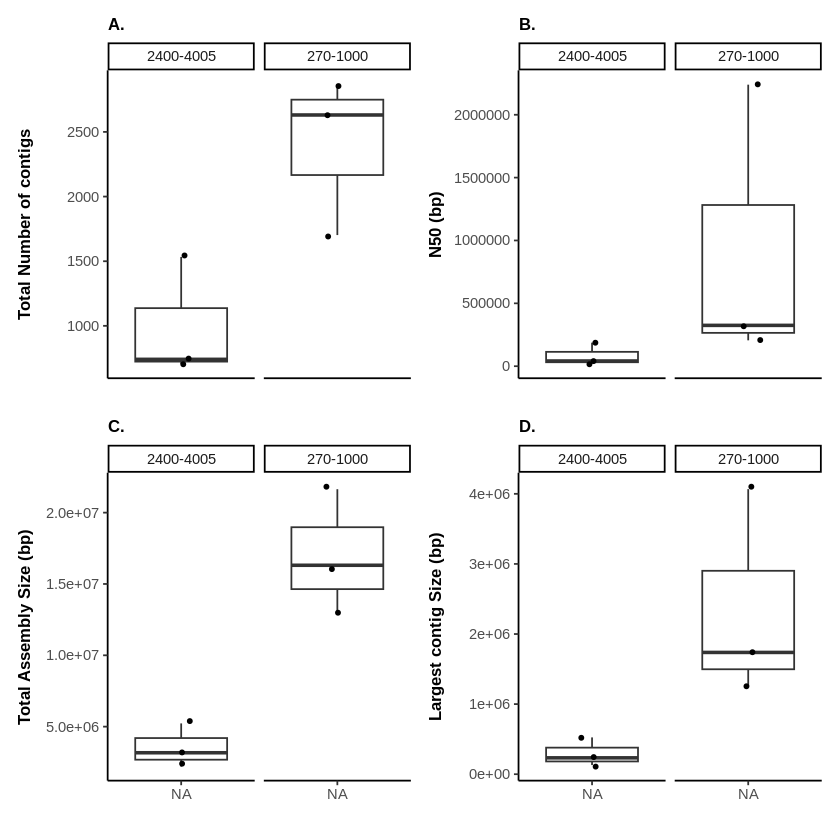

In [37]:
(g1 / g3) | (g2 / g4 )

ggsave("Figure2.png", width = 10, height = 10)